In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
sales = pd.read_csv('sales.csv')

In [4]:
sales.head()

,month,sales
0,2008-01,7615449
1,2008-02,8568396
2,2008-03,8819950
3,2008-04,9747502
4,2008-05,8009360


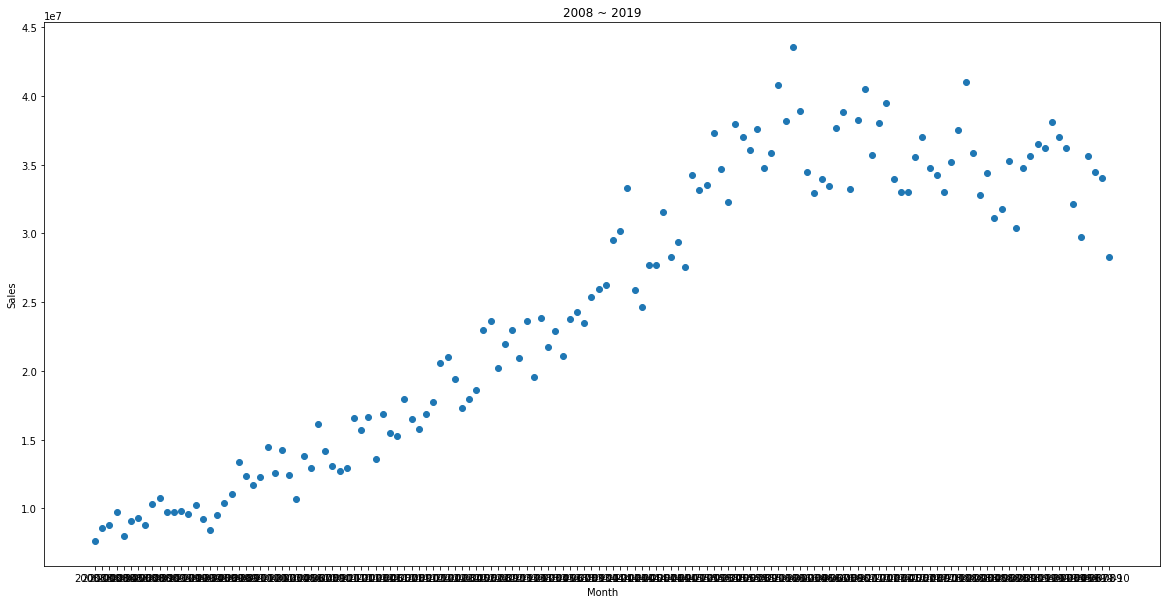

In [5]:
plt.figure(figsize=(20, 10))
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title("2008 ~ 2019")
plt.scatter(sales['month'], sales['sales'])
plt.show()

In [6]:
def yearmonth_to_num(year_month):
    start_year = 2008
    year, month = year_month.split('-')
    index = (int(year) - start_year) * 12 + (int(month) - 1)
    return index
    

In [7]:
yearmonth_to_num("2019-02")

133

In [8]:
yearmonth_index = [yearmonth_to_num(m) for m in sales['month']]

In [9]:
sales['yearmonth_index'] = yearmonth_index

In [10]:
sales.head()

,month,sales,yearmonth_index
0,2008-01,7615449,0
1,2008-02,8568396,1
2,2008-03,8819950,2
3,2008-04,9747502,3
4,2008-05,8009360,4


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
sales.values

array([['2008-01', 7615449, 0],
       ['2008-02', 8568396, 1],
       ['2008-03', 8819950, 2],
       ['2008-04', 9747502, 3],
       ['2008-05', 8009360, 4],
       ['2008-06', 9093838, 5],
       ['2008-07', 9303574, 6],
       ['2008-08', 8782821, 7],
       ['2008-09', 10311969, 8],
       ['2008-10', 10746532, 9],
       ['2008-11', 9737798, 10],
       ['2008-12', 9767261, 11],
       ['2009-01', 9827360, 12],
       ['2009-02', 9607434, 13],
       ['2009-03', 10238630, 14],
       ['2009-04', 9250043, 15],
       ['2009-05', 8405501, 16],
       ['2009-06', 9544035, 17],
       ['2009-07', 10376712, 18],
       ['2009-08', 11046516, 19],
       ['2009-09', 13334613, 20],
       ['2009-10', 12316032, 21],
       ['2009-11', 11669189, 22],
       ['2009-12', 12309787, 23],
       ['2010-01', 14467523, 24],
       ['2010-02', 12586453, 25],
       ['2010-03', 14253354, 26],
       ['2010-04', 12393216, 27],
       ['2010-05', 10672136, 28],
       ['2010-06', 13825379, 29],
     

In [13]:
X_train, X_test, y_train, y_test = train_test_split(sales['yearmonth_index'].values.reshape(-1,1), sales['sales'].values.reshape(-1,1), test_size=0.1)

In [14]:
X_train.shape

(127, 1)

In [15]:
y_train.shape

(127, 1)

In [16]:
X_test.shape

(15, 1)

In [17]:
y_test

array([[35540791],
       [10672136],
       [ 9607434],
       [24257864],
       [16467282],
       [38095216],
       [23009268],
       [30388959],
       [33480058],
       [16171131],
       [12937416],
       [20924017],
       [12316032],
       [31796964],
       [15235444]])

In [18]:
reg = LinearRegression().fit(X_train,  y_train)

In [19]:
reg.score(X_train,y_train)

0.8540220929673243

In [20]:
reg.coef_

array([[237866.20138265]])

In [21]:
reg.intercept_

array([8301484.82311319])

In [22]:
print(y_test)

[[35540791]
 [10672136]
 [ 9607434]
 [24257864]
 [16467282]
 [38095216]
 [23009268]
 [30388959]
 [33480058]
 [16171131]
 [12937416]
 [20924017]
 [12316032]
 [31796964]
 [15235444]]


In [23]:
predicts = reg.predict(X_test)

In [24]:
overall_diff_perc = 0

In [25]:
for y, y_hat in zip(y_test, predicts):
    overall_diff_perc += abs(y-y_hat)/y
    print("Sales: {}, Predicted Sales: {}, Diff: {}, Diff Percent: {}".format(y, y_hat, abs(y-y_hat), abs(y-y_hat)/y))
print("average diff percent: ", overall_diff_perc/len(y_test))

Sales: [35540791], Predicted Sales: [35418231.78073573], Diff: [122559.21926427], Diff Percent: [0.00344841]
Sales: [10672136], Predicted Sales: [14961738.4618275], Diff: [4289602.4618275], Diff Percent: [0.40194413]
Sales: [9607434], Predicted Sales: [11393745.44108769], Diff: [1786311.44108769], Diff Percent: [0.18593013]
Sales: [24257864], Predicted Sales: [24238520.315751], Diff: [19343.684249], Diff Percent: [0.00079742]
Sales: [16467282], Predicted Sales: [18767597.68394996], Diff: [2300315.68394996], Diff Percent: [0.13969006]
Sales: [38095216], Predicted Sales: [39937689.60700615], Diff: [1842473.60700615], Diff Percent: [0.04836496]
Sales: [23009268], Predicted Sales: [22097724.50330711], Diff: [911543.49669289], Diff Percent: [0.03961636]
Sales: [30388959], Predicted Sales: [38748358.60009289], Diff: [8359399.60009289], Diff Percent: [0.27508016]
Sales: [33480058], Predicted Sales: [32563837.36414388], Diff: [916220.63585612], Diff Percent: [0.02736616]
Sales: [16171131], Pre

In [26]:
reg.predict(np.array([142]).reshape(-1,1))

array([[42078485.41945004]])

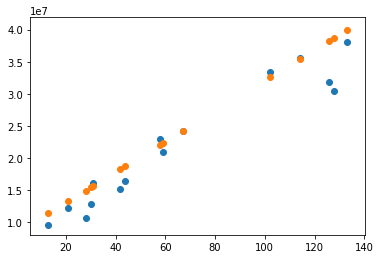

In [27]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, predicts)

## train model with lastest 12 months data

In [28]:
prev_month = '2019-07'
last_year_pre_month = '2018-07'

In [29]:
mask = (sales.month <= prev_month) & (sales.month >= last_year_pre_month)

In [30]:
last_one_year_sales = sales[mask]

In [31]:
X_train_12 = last_one_year_sales.yearmonth_index.values.reshape(-1,1)
y_train_12 = last_one_year_sales.sales.values.reshape(-1,1)

In [32]:
reg_last_one_year = LinearRegression().fit(X_train_12, y_train_12)

In [33]:
reg_last_one_year.coef_

array([[61456.43406593]])

In [34]:
reg_last_one_year.predict(np.array([142]).reshape(-1,1))

array([[35181411.87912088]])

In [35]:
prev_month = '2019-07'
last_year_pre_month = '2018-07'

In [36]:
predicts_12 = reg_last_one_year.predict(X_test)

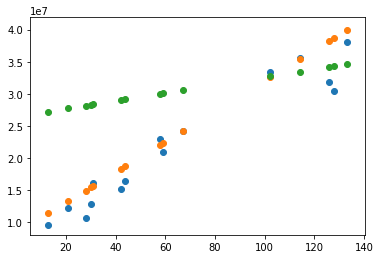

In [37]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, predicts)
plt.scatter(X_test, predicts_12)

In [38]:
predicts

array([[35418231.78073573],
       [14961738.4618275 ],
       [11393745.44108769],
       [24238520.315751  ],
       [18767597.68394996],
       [39937689.60700615],
       [22097724.50330711],
       [38748358.60009289],
       [32563837.36414388],
       [15675337.06597546],
       [15437470.86459281],
       [22335590.70468977],
       [13296675.05214892],
       [38272626.19732758],
       [18291865.28118465]])

In [39]:
predicts_12

array([[33460631.72527473],
       [28175378.39560439],
       [27253531.88461538],
       [30572179.32417582],
       [29158681.34065934],
       [34628303.97252747],
       [30019071.41758242],
       [34321021.8021978 ],
       [32723154.51648352],
       [28359747.6978022 ],
       [28298291.26373626],
       [30080527.85164835],
       [27745183.35714286],
       [34198108.93406593],
       [29035768.47252747]])

In [40]:
sales[sales['month']=='2019-08']

,month,sales,yearmonth_index
139,2019-08,34450755,139


In [41]:
sales[sales['month']=='2019-09']

,month,sales,yearmonth_index
140,2019-09,34044162,140


In [42]:
yearmonth_to_num('2019-08')

139

In [43]:
p1 = reg_last_one_year.predict(np.array([139, 140]).reshape(-1,1))

In [44]:
p2 = reg.predict(np.array([139, 140]).reshape(-1,1))

In [45]:
(p1 + p2) /2

array([[38180964.69611257],
       [38330626.01383687]])

In [46]:
def predict_all(year_month):
    year_month_index = [yearmonth_to_num(ym) for ym in year_month]
    p = reg.predict(np.array([year_month_index]).reshape(-1,1))
    return p.flatten()

In [47]:
def predict_12(year_month):
    year_month_index = [yearmonth_to_num(ym) for ym in year_month]
    p = reg_last_one_year.predict(np.array([year_month_index]).reshape(-1,1))
    return p.flatten()

In [48]:
def predict_avg(year_month):
    year_month_index = [yearmonth_to_num(ym) for ym in year_month]
    p1 = reg_last_one_year.predict(np.array([year_month_index]).reshape(-1,1))
    p2 = reg.predict(np.array([year_month_index]).reshape(-1,1))
    avg = (p1.flatten() + p2.flatten()) / 2
    return avg

In [49]:
predict_avg(['2019-09','2019-10'])

array([38330626.01383687, 38480287.33156116])

In [50]:
len(sales['sales'].values)

142

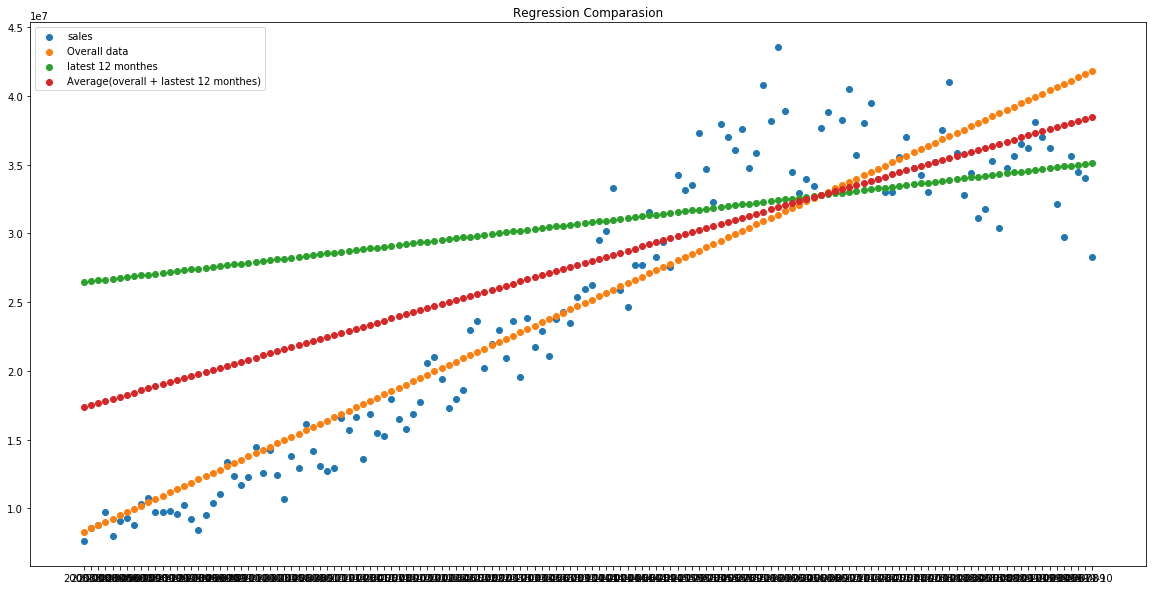

In [51]:
plt.figure(figsize=(20, 10))
plt.title("Regression Comparasion")
plt.scatter(sales['month'], sales['sales'])
plt.scatter(sales['month'], predict_all(sales['month'].values), label='Overall data')
plt.scatter(sales['month'], predict_12(sales['month'].values), label="latest 12 monthes")
plt.scatter(sales['month'], predict_avg(sales['month'].values), label="Average(overall + lastest 12 monthes)")
plt.legend()

## prediction with optimized train set

In [55]:
X_train, X_test, y_train, y_test

array([[114],
       [ 28],
       [ 13],
       [ 67],
       [ 44],
       [133],
       [ 58],
       [128],
       [102],
       [ 31],
       [ 30],
       [ 59],
       [ 21],
       [126],
       [ 42]])

In [115]:
twisted_param =  np.sqrt(X_train)

In [116]:
twisted_param1 =  np.sqrt(twisted_param)

In [117]:
X_train_optimal = np.append(X_train, twisted_param, axis=1)

In [118]:
#X_train_optimal = np.append(X_train, twisted_param1, axis=1)

In [119]:
Reg_optimal = LinearRegression().fit(X_train_optimal, y_train)

In [120]:
def predict_optimal(year_month):
    year_month_index = [yearmonth_to_num(ym) for ym in year_month]
    year_month_index = np.array(year_month_index).reshape(-1,1)
    year_month_index_twisted = np.sqrt(year_month_index);
    #year_month_index_twisted1 = np.sqrt(year_month_index_twisted);
    year_month_optimal = np.append(year_month_index, year_month_index_twisted, axis=1)
    #year_month_optimal = np.append(year_month_index, year_month_index_twisted1, axis=1)
    p = Reg_optimal.predict(year_month_optimal)
    return p.flatten()
    

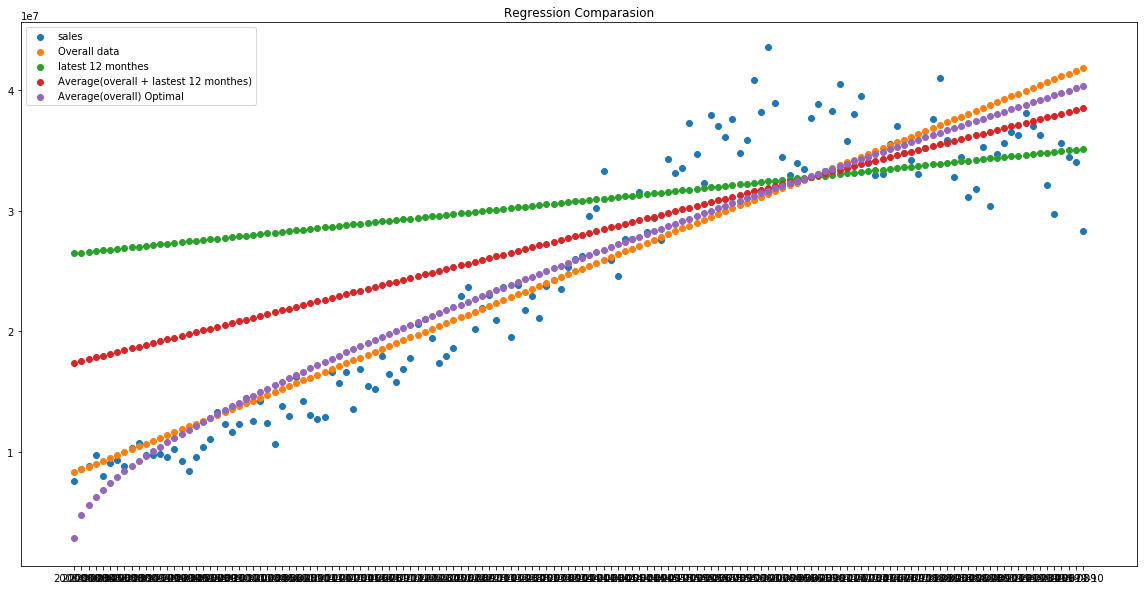

In [121]:
plt.figure(figsize=(20, 10))
plt.title("Regression Comparasion")
plt.scatter(sales['month'], sales['sales'])
plt.scatter(sales['month'], predict_all(sales['month'].values), label='Overall data')
plt.scatter(sales['month'], predict_12(sales['month'].values), label="latest 12 monthes")
plt.scatter(sales['month'], predict_avg(sales['month'].values), label="Average(overall + lastest 12 monthes)")
plt.scatter(sales['month'], predict_optimal(sales['month'].values), label="Average(overall) Optimal")
plt.legend()